In [1]:
import pandas as pd
import numpy as np
import time
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import pdist,squareform, cosine

import itertools

In [2]:
x = joblib.load('essay_tfidf_asap7')
x_i = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
traits = joblib.load('df_essay7_traits_sum')
x_normed = (x_i-x_i.min(axis=0))/(x_i.max(axis=0)-x_i.min(axis=0))
feats = joblib.load('feat_names12')

In [3]:
score_gb = joblib.load('score_model_gb_normalized_float_tfidf')
score_rf = joblib.load('score_model_rf_normalized_float_tfidf')
score_rr = joblib.load('score_model_rr_normalized_float_tfidf')

## Cosine

In [4]:
dist1d = pdist(x, metric='cosine')
dist1d

array([0.94960162, 0.96915322, 0.90028082, ..., 0.92706048, 0.94591889,
       0.90025714])

In [5]:
iterator = list(itertools.combinations(range(1569),2))
iterator[:5]

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

In [6]:
iterator.index((0,6))

5

In [7]:
dist1d[5]

0.9455288523377676

In [8]:
cosine(x[0],x[6])

0.9455288523377676

In [9]:
#euclidean distance
np.linalg.norm(x[0]-x[6])

1.3751573381528148

In [10]:
# Normalize
# dist1d = dist1d / np.max(dist1d)
# dist1d

In [11]:
# MinMax Normalization
dist1d = (dist1d-min(dist1d))/(max(dist1d)-min(dist1d))
dist1d

array([0.91553717, 0.94830377, 0.83288025, ..., 0.87776039, 0.90936527,
       0.83284057])

In [12]:
iterdist = list(zip(iterator, dist1d))

In [13]:
iterdist

[((0, 1), 0.9155371719323101),
 ((0, 2), 0.9483037684569007),
 ((0, 3), 0.8328802533264318),
 ((0, 4), 0.9090347288773053),
 ((0, 5), 0.9463637668707894),
 ((0, 6), 0.9087116012330686),
 ((0, 7), 0.9249206269565116),
 ((0, 8), 0.7226465488216665),
 ((0, 9), 0.7908703652021539),
 ((0, 10), 0.8799809936643878),
 ((0, 11), 0.9094679298047644),
 ((0, 12), 0.8749827093318076),
 ((0, 13), 0.921116995048051),
 ((0, 14), 0.9021620916652844),
 ((0, 15), 0.9306850182945015),
 ((0, 16), 0.9241032040082819),
 ((0, 17), 0.9684063186821686),
 ((0, 18), 0.9635920268855794),
 ((0, 19), 0.8944662717613578),
 ((0, 20), 0.9060543213352347),
 ((0, 21), 0.9331284410824576),
 ((0, 22), 0.9354899603025629),
 ((0, 23), 0.8832051061248574),
 ((0, 24), 0.8979154354385959),
 ((0, 25), 0.918534151912184),
 ((0, 26), 0.8763543355784128),
 ((0, 27), 0.9094066415005614),
 ((0, 28), 0.9543460160806015),
 ((0, 29), 0.9254415421220337),
 ((0, 30), 0.8558514165817253),
 ((0, 31), 0.6991168668883344),
 ((0, 32), 0.959629

In [14]:
iterdist_sorted = sorted(iterdist, key=lambda x: x[1])

iterdist_sorted

[((207, 1073), 0.0),
 ((66, 207), 0.012982710536742393),
 ((156, 207), 0.016312237690930192),
 ((28, 207), 0.033968887775391164),
 ((207, 1254), 0.04263599337918919),
 ((28, 66), 0.05887713907272039),
 ((28, 1073), 0.07301155301392058),
 ((28, 156), 0.07843837847717429),
 ((66, 1254), 0.09294980504075538),
 ((66, 156), 0.108548253196494),
 ((28, 1254), 0.11211613708721548),
 ((66, 1073), 0.11268834852942436),
 ((156, 1254), 0.11880714537971707),
 ((28, 381), 0.12318065318038261),
 ((207, 381), 0.126876416640084),
 ((156, 1073), 0.12770381236546788),
 ((66, 381), 0.1382322066752802),
 ((1073, 1254), 0.18502875270247693),
 ((381, 1073), 0.1886686457790028),
 ((66, 827), 0.18889697273124903),
 ((207, 866), 0.19206000138419627),
 ((66, 866), 0.19941496514141344),
 ((866, 1254), 0.201435898560309),
 ((381, 1254), 0.20318666039184263),
 ((28, 866), 0.2038144061943891),
 ((66, 301), 0.211553212376159),
 ((28, 827), 0.21158939185410852),
 ((156, 381), 0.21182264424567457),
 ((28, 330), 0.21718

In [16]:
joblib.dump(iterdist_sorted, 'iterdist_sorted_tfidf')

['iterdist_sorted_tfidf']

In [15]:
iterdist_sorted[-10:]

[((1215, 1503), 1.0),
 ((1218, 1526), 1.0),
 ((1252, 1503), 1.0),
 ((1254, 1503), 1.0),
 ((1309, 1503), 1.0),
 ((1418, 1503), 1.0),
 ((1432, 1503), 1.0),
 ((1466, 1503), 1.0),
 ((1468, 1485), 1.0),
 ((1468, 1526), 1.0)]

In [20]:
print("Score: ", traits.loc[1468]['domain1_score'])
print(traits.loc[1468]['essay'])
print("---------------------------")
print("Score: ", traits.loc[1526]['domain1_score'])
print(traits.loc[1526]['essay'])

Score:  10
My own way about patient is that when somebody is doing something. You have to wait until they done. An if you rush them they probably will make a mistake or do something wrong. Being patient is a very important thing. Being patient is also a very respectful thing to another person because you not being rude.
---------------------------
Score:  24
@CAPS2 father has recently lost his job. It has been hard. It has exactly @NUM1 since @CAPS2 father has had job. @CAPS2 father has been constantly applying for jobs. But he didn't give up. He kept on trying and trying. Fortunately @CAPS2 father has a job interview in san @CAPS1 in a couple of weeks he is going. Hopefully he will get the job.  Thankfully @CAPS2 father has been very patient. Even though he is being rejected constantly, he still trys very hard to get a job. @CAPS2 father is @CAPS2 I role model because of his amazing level of patientence. Thank god, I have someone to care for me who his as patient as @CAPS2 father. Wit

## Nearest & Farthest Pair of Essays

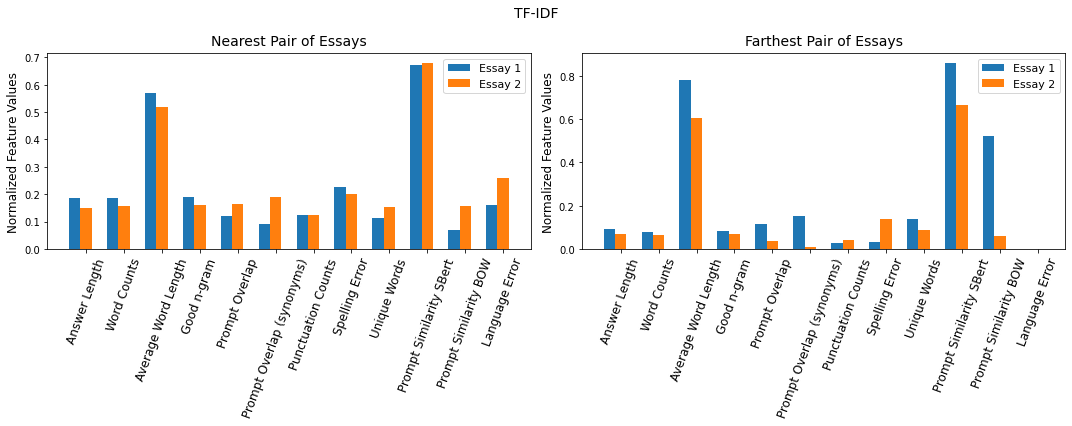

In [16]:
a = x_normed[207][:12]
b = x_normed[1073][:12]

c = x_normed[1468][:12]
d = x_normed[1526][:12]

ind = np.arange(12)
width = 0.3

plt.figure(figsize=(15,6))
plt.title("Feature Differences")
plt.suptitle("TF-IDF", fontsize=14)

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Nearest Pair of Essays", fontsize=14, y=1.01)
ax1.bar(ind, a, width, align='center', label='Essay 1')
ax1.bar(ind + width, b, width, align='center', label='Essay 2')
ax1.set_ylabel("Normalized Feature Values", fontsize=12)
ax1.set_xticks(ind + width)
ax1.set_xticklabels(feats, fontdict=None, minor=False, fontsize=12, rotation=70)
ax1.legend(fontsize=11, loc='upper right')#, framealpha=0.5)#fancybox=True, shadow=True, borderpad=0.5)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Farthest Pair of Essays", fontsize=14, y=1.01)
ax2.bar(ind, c, width, align='center', label='Essay 1')
ax2.bar(ind + width, d, width, align='center', label='Essay 2')
ax2.set_ylabel("Normalized Feature Values", fontsize=12)
ax2.set_xticks(ind + width)
ax2.set_xticklabels(feats, fontdict=None, minor=False, fontsize=12, rotation=70)
ax2.legend(fontsize=11, loc='upper right')#, framealpha=0.5)#, fancybox=True, shadow=True, borderpad=0.5)

# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, labels, bbox_to_anchor= (1, 1), fontsize = 18)

plt.tight_layout()
plt.savefig('nearest_farthest_tfidf.png')
plt.show()

In [17]:
joblib.dump(a, 'near_1_tfidf')
joblib.dump(b, 'near_2_tfidf')
joblib.dump(c, 'far_1_tfidf')
joblib.dump(d, 'far_2_tfidf')

['far_2_tfidf']

In [23]:
dist1d_sorted = np.sort(dist1d)
dist1d_sorted

array([0.        , 0.01298271, 0.01631224, ..., 1.        , 1.        ,
       1.        ])

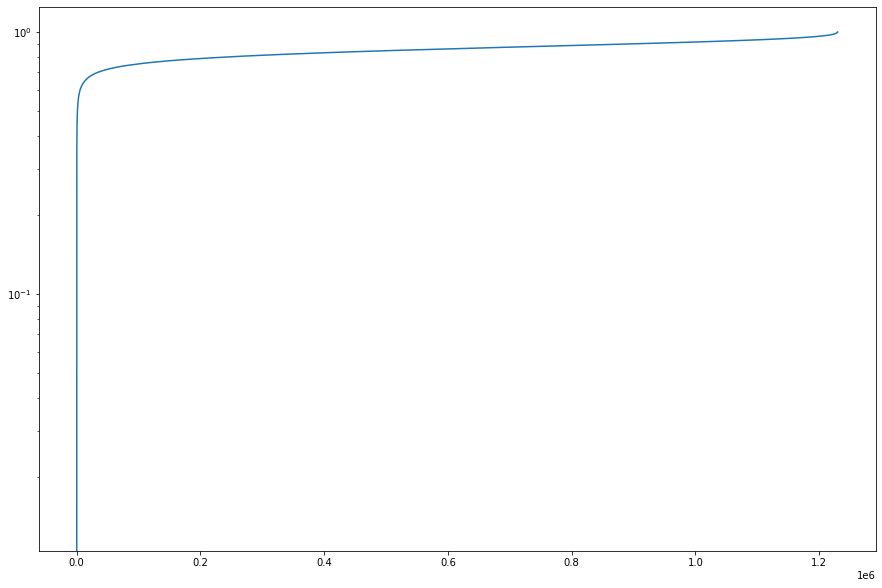

In [24]:
ind = np.arange(len(dist1d_sorted))

plt.figure(figsize=(15,10))
#plt.bar(ind, dist1d_sorted[:100])
#plt.hist(dist1d_sorted, bins=1000)
plt.plot(dist1d_sorted)
plt.yscale('log')
plt.show()

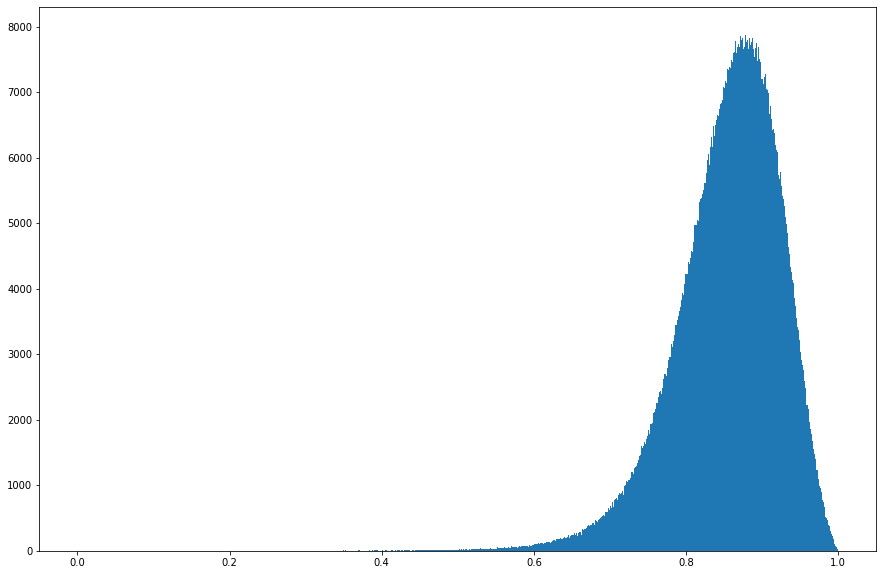

In [25]:
ind = np.arange(len(dist1d_sorted))

plt.figure(figsize=(15,10))
#plt.bar(ind, dist1d_sorted[:100])
plt.hist(dist1d_sorted, bins=1000)
#plt.plot(dist1d_sorted)
#plt.yscale('log')
plt.show()

In [26]:
import random
samples = random.sample(list(dist1d_sorted), 100)
#samples

In [27]:
samples_sorted = np.sort(samples)
#samples_sorted

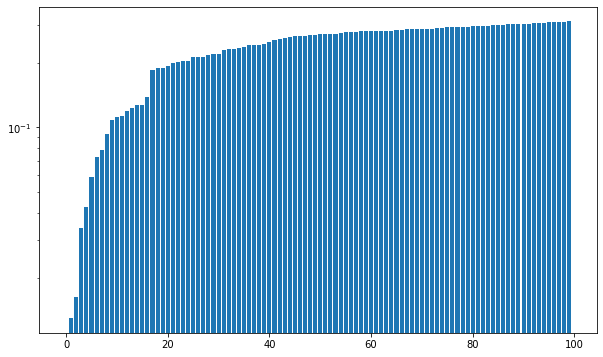

In [28]:
ind = np.arange(100)

plt.figure(figsize=(10,6))
plt.bar(ind, dist1d_sorted[:100])
#plt.hist(dist1d_sorted[:100], bins=10)
#plt.plot(samples_sorted)
plt.yscale('log')
plt.show()

In [29]:
#iterdist_sorted

In [30]:
def compute_difference(pairs):
    answer_length = []
    word_count = []
    avg_word_length = []

    feat_diff_all = []

    for pair in pairs:
        feat_diff = []

        idx1 = pair[0]
        idx2 = pair[1]

        feat1 = x_normed[idx1][:12]
        feat2 = x_normed[idx2][:12]

        for i in range(12):
            diff = abs(feat1[i] - feat2[i])
            feat_diff.append(diff)

        feat_diff_all.append(feat_diff)
    
    return feat_diff_all

## Nearest pairs

In [31]:
nearest_pairs_iter = iterdist_sorted[:10000]

nearest_pairs = [i[0] for i in nearest_pairs_iter]
#nearest_pairs

feat_diff_all = compute_difference(nearest_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

nearest_diff = b
nearest_diff

array([0.16296241, 0.16494108, 0.11300783, 0.16560266, 0.19225597,
       0.16252883, 0.10757456, 0.06419182, 0.15582402, 0.1345942 ,
       0.13463539, 0.05920114])

## Farthest pairs

In [32]:
farthest_pairs_iter = iterdist_sorted[-10000:]

farthest_pairs = [i[0] for i in farthest_pairs_iter]

feat_diff_all = compute_difference(farthest_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

farthest_diff = b
farthest_diff

array([0.11781957, 0.12131355, 0.24505072, 0.12188595, 0.14618931,
       0.13557027, 0.05826686, 0.13988111, 0.14167913, 0.22419283,
       0.2827078 , 0.10028972])

## Medium distance

In [33]:
medium_pairs_iter = iterdist_sorted[610000:620000]

medium_pairs = [i[0] for i in medium_pairs_iter]

feat_diff_all = compute_difference(medium_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

medium_diff = b
medium_diff

array([0.14968723, 0.15253595, 0.14730724, 0.15324181, 0.1741195 ,
       0.1583955 , 0.08356627, 0.07215123, 0.15289252, 0.1662696 ,
       0.16800649, 0.06543904])

In [34]:
nearest_diff < farthest_diff

array([False, False,  True, False, False, False, False,  True, False,
        True,  True,  True])

In [35]:
nearest_diff < medium_diff

array([False, False,  True, False, False, False, False,  True, False,
        True,  True,  True])

In [36]:
medium_diff < farthest_diff

array([False, False,  True, False, False, False, False,  True, False,
        True,  True,  True])

In [37]:
feats

['Answer Length',
 'Word Counts',
 'Average Word Length',
 'Good n-gram',
 'Prompt Overlap',
 'Prompt Overlap (synonyms)',
 'Punctuation Counts',
 'Spelling Error',
 'Unique Words',
 'Prompt Similarity SBert',
 'Prompt Similarity BOW',
 'Language Error']

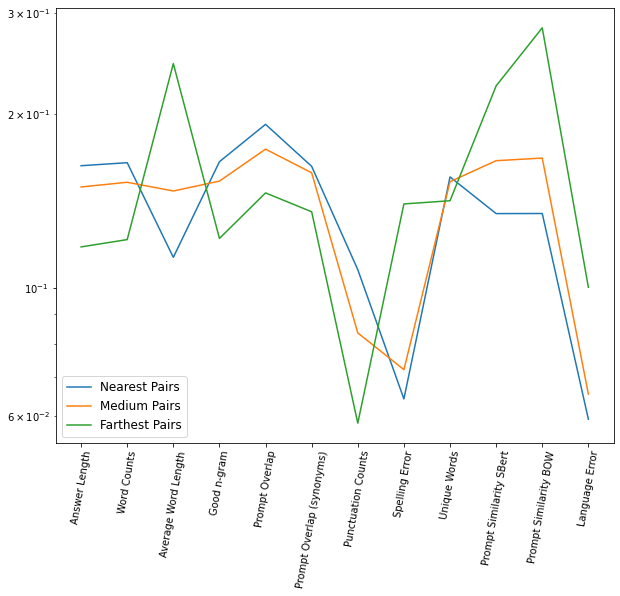

In [38]:
plt.figure(figsize=(10,8))
plt.plot(nearest_diff, label='Nearest Pairs')
plt.plot(medium_diff, label='Medium Pairs')
plt.plot(farthest_diff, label='Farthest Pairs')
plt.xticks(range(0,12), feats, rotation=80)
plt.legend(fontsize=12)
plt.yscale('log')
plt.show()

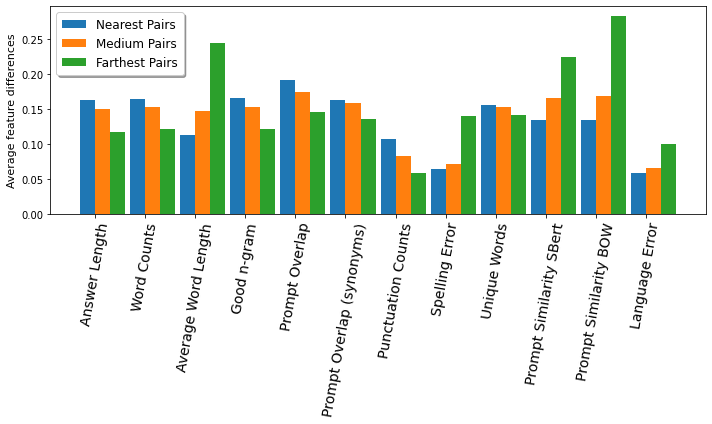

In [39]:
a = nearest_diff
b = medium_diff
c = farthest_diff

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(ind, a, width, align='center', label='Nearest Pairs')
plt.bar(ind + width, b, width, align='center', label='Medium Pairs')
plt.bar(ind + width + width, c, width, align='center', label='Farthest Pairs')

plt.ylabel("Average feature differences", fontsize=11)
plt.xticks(ind + width / 2, feats, fontsize=14, rotation=80)
plt.tight_layout()
plt.legend(fontsize=12, fancybox=True, shadow=True, borderpad=0.5)#, frameon=False)
plt.savefig('feat_difference_tfidf.png')
plt.show()

In [40]:
joblib.dump(nearest_diff, 'nearest_diff_tfidf')
joblib.dump(medium_diff, 'medium_diff_tfidf')
joblib.dump(farthest_diff, 'farthest_diff_tfidf')

['farthest_diff_tfidf']

In [137]:
def compute_score_difference(pairs):
    score_diff_gb = []
    score_diff_rf = []
    score_diff_rr = []
    
    for pair in pairs:

        idx1 = pair[0]
        idx2 = pair[1]

        diff = abs(score_gb[idx1] - score_gb[idx2])
        score_diff_gb.append(diff)
        
        diff = abs(score_rf[idx1] - score_rf[idx2])
        score_diff_rf.append(diff)
        
        diff = abs(score_rr[idx1] - score_rr[idx2])
        score_diff_rr.append(diff)
    
    return score_diff_gb, score_diff_rf, score_diff_rr

In [141]:
a, b, c = compute_score_difference(nearest_pairs)

a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_nearest = [a,b,c]

a, b, c = compute_score_difference(medium_pairs)

a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_medium = [a,b,c]

a, b, c = compute_score_difference(farthest_pairs)


a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_farthest = [a,b,c]

In [145]:
score_diff_nearest

[2.771181809902191, 1.959772, 5.4348236000000005]

In [146]:
score_diff_medium

[3.8270563665866852, 3.246147, 5.0251504]

In [147]:
score_diff_farthest

[5.917873597717285, 6.258018, 4.6881702]

In [148]:
joblib.dump(score_diff_nearest, 'score_diff_nearest_ngram')
joblib.dump(score_diff_medium, 'score_diff_medium_ngram')
joblib.dump(score_diff_farthest, 'score_diff_farthest_ngram')

['score_diff_farthest_ngram']